# Descriptive analysis of oceanographic data
-----

This notebook provides a demonstration of how to read data and plot sections to
understand the temperature/salinity structure of ocean water.

You will have to install anaconda python to easily setup the required packages.
If you don't want to install the entire distribution, you can install miniconda
and install only those packages that you need.

You will need to install at least xarray, netCDF4 and [gsw](https://teos-10.github.io/GSW-Python/install.html)
along with the basic packages such as numpy/matplotlib etc., to get started.

In [74]:
import xarray
import gsw
import numpy as np
import matplotlib.pyplot as plt

Read in the data and see the coordinates and variables it contains. The description of this
data is available [here](https://icdc.cen.uni-hamburg.de/en/woce-climatology.html) and [here](ftp://ftp-icdc.cen.uni-hamburg.de/WOCE/climatology/observed_data/BSH35_report_final.pdf) (skim over it!)

In [75]:
data = xarray.open_dataset('WOCE.nc')

In [76]:
data

<xarray.Dataset>
Dimensions:   (LAT: 341, LON: 720, ZAX: 44)
Coordinates:
  * LON       (LON) float64 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * LAT       (LAT) float64 -80.0 -79.5 -79.0 -78.5 ... 88.5 89.0 89.5 90.0
  * ZAX       (ZAX) float64 0.0 10.0 20.0 30.0 ... 5.25e+03 5.5e+03 5.75e+03
Data variables:
    Gamman    (ZAX, LAT, LON) float32 ...
    Temp      (ZAX, LAT, LON) float32 ...
    Tpoten    (ZAX, LAT, LON) float32 ...
    Salinity  (ZAX, LAT, LON) float32 ...
    Bot_Dep   (ZAX, LAT, LON) float32 ...
    Pres      (ZAX, LAT, LON) float32 ...
    Silicate  (ZAX, LAT, LON) float32 ...

Plot the temperature at different levels (by selecting the relevant vertical coordinate).

Here you will see the water temperature at 1000 meters below the surface. Can you interpret the 
patterns? The textbook (section 13.4) and the assigned book chapter should help!

<IPython.core.display.Javascript object>


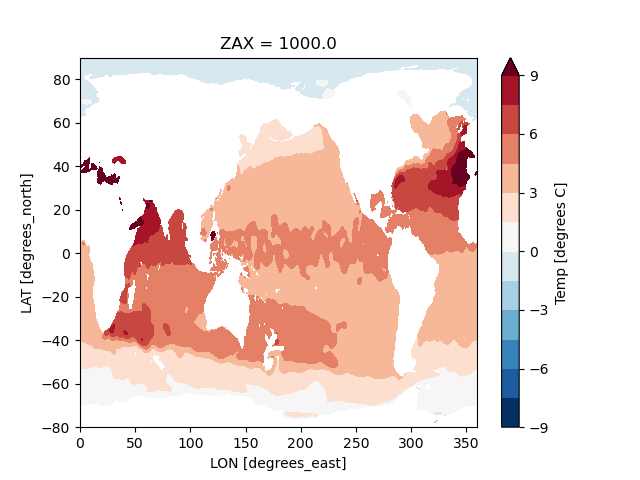

In [82]:
%matplotlib notebook 
data.loc[dict(ZAX=1000)].Temp.plot.contourf(robust=True, levels=15)

The following function is an illustration to calculate quantities of physical interest from
the available data. See the GSW documentation to find further functions that you might want to
use.

In [28]:
def get_density(salinity, temperature, pressure, longitude, latitude):
    
    SA = gsw.SA_from_SP(salinity, pressure, longitude, latitude)
    CT = gsw.CT_from_t(SA, temperature, pressure)
    
    return gsw.density.rho(SA, CT, pressure)

Plot a vertical section in Temperature-Salinity space. Read about how to interpret this in the textbook and the assigned book chapter.

The colors are the density which helps us identify different water masses.

<IPython.core.display.Javascript object>


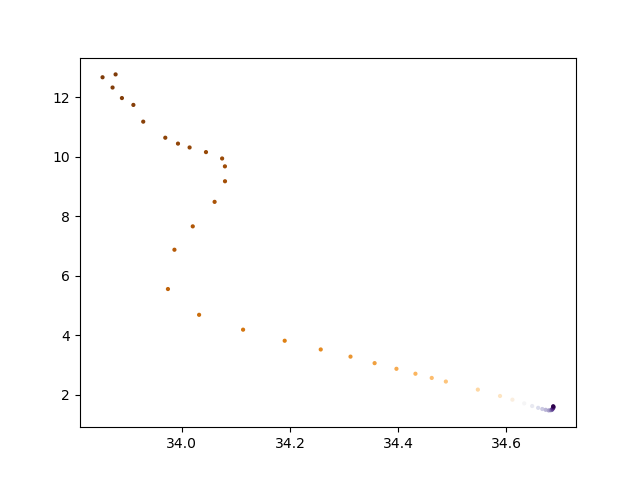

In [83]:
%matplotlib notebook

vert_section = data.loc[dict(LAT=40, LON=200)]
density = get_density(vert_section.Salinity, vert_section.Temp, vert_section.Pres,
                      vert_section.LON, vert_section.LAT)

lat_grid, lon_grid = np.meshgrid(vert_section.LAT, vert_section.LON)

lat_grid = np.broadcast_to(lat_grid, [44, lat_grid.shape[0], lat_grid.shape[1]])/10

plt.scatter(vert_section.Salinity, vert_section.Temp, s=lat_grid, c=density, cmap='PuOr')

You can do the same for a region to see what water masses exists in a particular part of the
ocean. The below plot is for the North Atlantic.

<IPython.core.display.Javascript object>


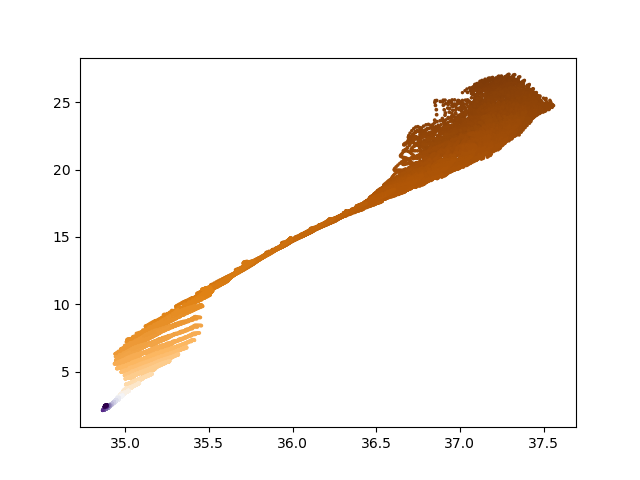

In [84]:
%matplotlib notebook
lat_start = 20
lat_end = 30

vert_section = data.loc[dict(LAT=slice(lat_start, lat_end), LON=slice(310, 330))]
density = get_density(vert_section.Salinity, vert_section.Temp, vert_section.Pres,
                      vert_section.LON, vert_section.LAT)

lat_grid, lon_grid = np.meshgrid(vert_section.LAT, vert_section.LON)

lat_grid = np.broadcast_to(lat_grid, [44, lat_grid.shape[0], lat_grid.shape[1]])/10

plt.scatter(vert_section.Salinity, vert_section.Temp, s=lat_grid, c=density, cmap='PuOr')

Similarly, you can plot Neutral density surfaces in the ocean basins. It makes sense to take a mean
across some latitudes. We have ignored the first two hundred meters by slicing `ZAX` to those levels we are
interested in. A similar slicing along `LON` allows us to choose the Pacific Basin (see lat-lon plot of temperature to find approximate longitudinal extents of ocean basins)

<IPython.core.display.Javascript object>


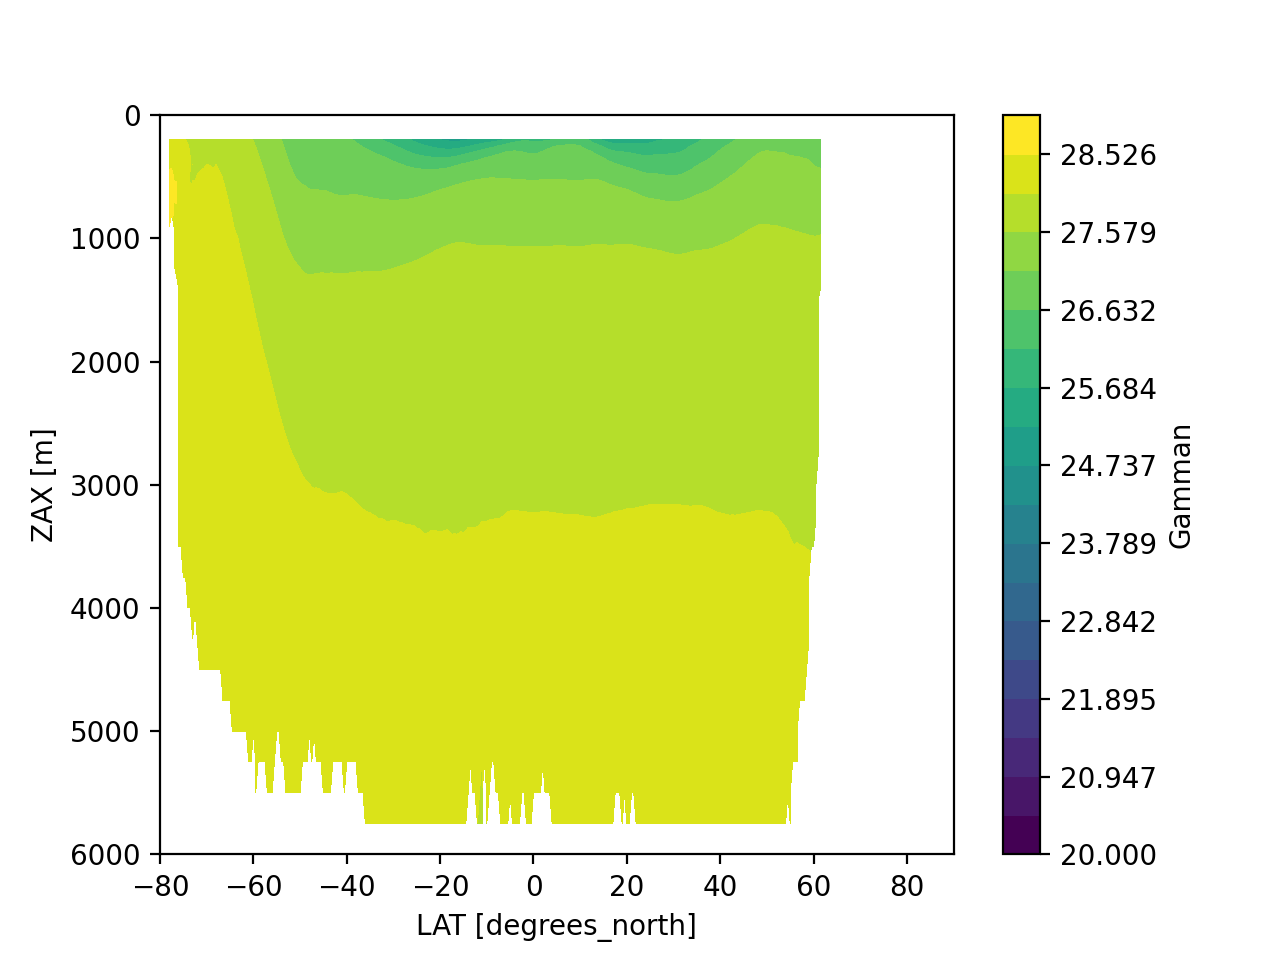

(6000.0, 0.0)

In [42]:
%matplotlib notebook

pacific = data.loc[dict(LON=slice(150, 250), ZAX=slice(200, 6000))]

pacific.Gamman.mean(dim=['LON']).plot.contourf(levels=np.linspace(20, 29, 20))
plt.ylim(6000, 0)

You can do the same for any variable in the dataset. Here we plot potential temperature. Regions without colour usually represent continents or mid-ocean topography.

<IPython.core.display.Javascript object>


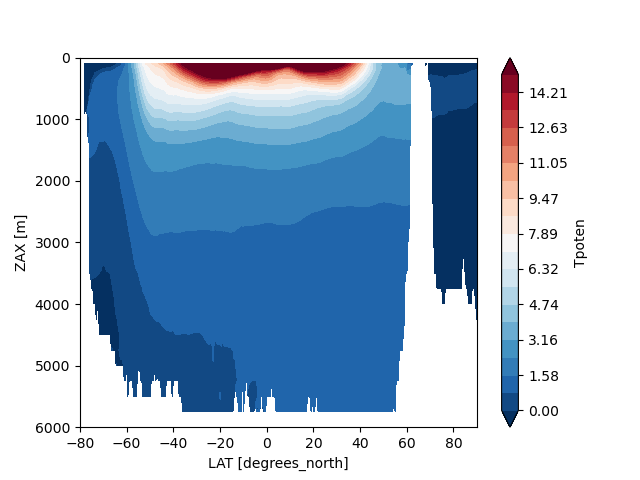

(6000.0, 0.0)

In [71]:
%matplotlib notebook

pacific = data.loc[dict(LON=slice(150, 250), ZAX=slice(100, 6000))]

pacific.Tpoten.mean(dim=['LON']).plot.contourf(levels=np.linspace(0, 15, 20))
plt.ylim(6000, 0)

# Starting Points
--------

Select (at least) two regions (explicitly mention the same) from two different ocean basins and maybe different (north/south) hemispheres.

* Show how thermo/halocline changes with latitude.
* Using T/S plots, identify regions/depths/basins with high/low mixing.
* Plot Neutral density surfaces and infer the circulation in the basins.
* Plot large-scale variations with depth of temperature/salinity in the world ocean (like above) and interpret the resulting plots.
* Compare and contrast the characteristics for the two selected regions in terms of ocean-atmosphere interaction (which sets surface properties) and large scale circulation (use Chapter 6 in the textbook along with Aditi's lectures).